In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('amazon.csv')
print(df.head(10))

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
5  B08Y1TFSP6  pTron Solero TB301 3A Type-C Data and Fast Cha...   
6  B08WRWPM22  boAt Micro USB 55 Tangle-free, Sturdy Micro US...   
7  B08DDRGWTJ             MI Usb Type-C Cable Smartphone (Black)   
8  B008IFXQFU  TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...   
9  B082LZGK39  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accesso

In [35]:
import pandas as pd

# 1. Clean price columns (remove ₹ and commas, convert to numeric)
def clean_price(col):
    col = col.astype(str).str.replace('[₹,]', '', regex=True)
    return pd.to_numeric(col, errors='coerce')

df['discounted_price'] = clean_price(df['discounted_price'])
df['actual_price'] = clean_price(df['actual_price'])

# 2. Clean discount percentage column (remove % symbol and convert)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=True)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# 3. Clean rating column (convert to numeric, handle errors)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# 4. Clean rating count column (remove commas and convert)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=True)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# 5. Remove duplicates if any (optional, based on key columns)
df.drop_duplicates(inplace=True)

# 6. Handle missing values:
df.dropna(subset=['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count'], inplace=True)

# 7. For string columns with whitespace or inconsistent casing, standardize if needed
string_cols = ['product_name', 'category', 'user_name']
for col in string_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()


print(df.dtypes)  # Check data types after cleaning

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [36]:
df.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,computers&accessories|accessories&peripherals|...,399.00,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","manav,adarsh gupta,sundeep,s.sayeed ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,ambrane unbreakable 60w / 3a fast charging 1.5...,computers&accessories|accessories&peripherals|...,199.00,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ardkn,nirbhay kumar,sagar viswanathan,asp,plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,sounce fast phone charging cable & data sync u...,computers&accessories|accessories&peripherals|...,199.00,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","kunal,himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boat deuce usb 300 2 in 1 type-c & micro usb s...,computers&accessories|accessories&peripherals|...,329.00,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","omkar dhale,jd,hemalatha,ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,portronics konnect l 1.2m fast charging 3a 8 p...,computers&accessories|accessories&peripherals|...,154.00,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,swasat borah,ajay wadke,pranali,rvk...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,ptron solero tb301 3a type-c data and fast cha...,computers&accessories|accessories&peripherals|...,149.00,1000.0,85,3.9,24871.0,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","jayesh,rajesh k.,soopy,amazon customer,aman,sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boat micro usb 55 tangle-free, sturdy micro us...",computers&accessories|accessories&peripherals|...,176.63,499.0,65,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","vivek kumar,amazon customer,sarthak,chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_40237.

Pricing and Discount Analysis


In [19]:
# Q1. Average discounted and actual price


avg_discounted_price = df['discounted_price'].mean()
avg_actual_price = df['actual_price'].mean()
print(f"Average Discounted Price: ₹{avg_discounted_price:.2f}")
print(f"Average Actual Price: ₹{avg_actual_price:.2f}")

Average Discounted Price: ₹3125.31
Average Actual Price: ₹5444.99


In [15]:
# Q2. Standard deviation of discount percentage
std_discount = df['discount_percentage'].std()
print(f"Standard Deviation of Discount Percentage: {std_discount:.2f}%")

Standard Deviation of Discount Percentage: 21.64%


In [16]:
# Q3. Product with highest discount percentage
max_disc_product = df.loc[df['discount_percentage'].idxmax(), ['product_name', 'product_id']]
print(f"Product with Highest Discount Percentage: {max_disc_product['product_name']} (ID: {max_disc_product['product_id']})")

Product with Highest Discount Percentage: rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver (ID: B097C564GC)


In [18]:
# Q4. Total potential savings
total_savings = (df['actual_price'] - df['discounted_price']).sum()
print(f"Total Potential Savings: ₹{total_savings:.2f}")

Total Potential Savings: ₹3398330.85


In [21]:
# Q5. Average actual price for products with >50% discount
avg_actual_gt50 = df.loc[df['discount_percentage'] > 50, 'actual_price'].mean()
print(f"Average Actual Price for Products with >50% Discount: ₹{avg_actual_gt50:.2f}")

Average Actual Price for Products with >50% Discount: ₹3514.52


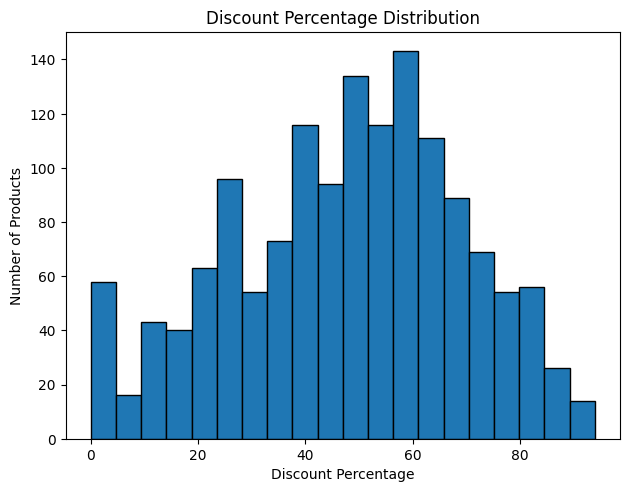

In [28]:
# Q6. Histogram of discount percentage
import matplotlib.pyplot as plt
plt.hist(df['discount_percentage'], bins=20,edgecolor='black', linewidth=1)
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.title('Discount Percentage Distribution')
plt.show()


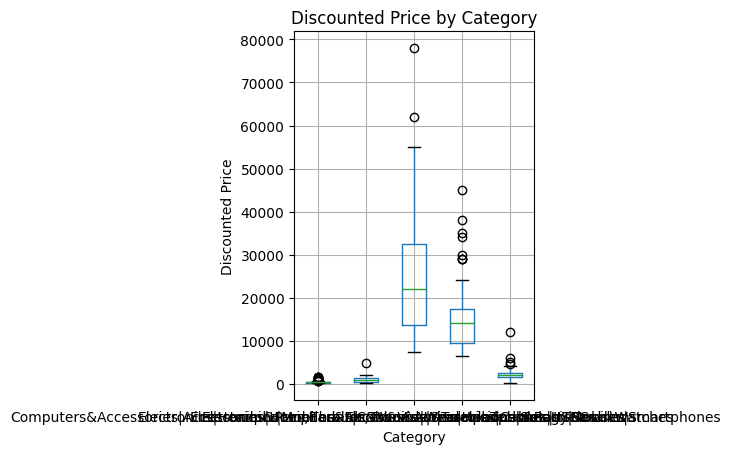

In [ ]:
# Q7. Box plots for top 5 largest categories (by product count)
top5_categories = df['category'].value_counts().nlargest(5).index
df_top5 = df[df['category'].isin(top5_categories)]
df_top5.boxplot(column='discounted_price', by='category')
plt.title('Discounted Price by Category')
plt.suptitle('')  
plt.xlabel('Category')
plt.ylabel('Discounted Price')
plt.tight_layout()
plt.show()


Rating and Review Analysis


In [37]:
# Q9. Weighted average rating
import numpy as np
weighted_avg_rating = np.average(df['rating'], weights=df['rating_count'])
print(f"Weighted Average Rating: {weighted_avg_rating:.2f}")

Weighted Average Rating: 4.17


In [41]:
# Q10. Product with highest rating count
high_rating_product = df.loc[df['rating_count'].idxmax(), 'product_id']
print(f"Product with Highest Rating Count: ID {high_rating_product}")

Product with Highest Rating Count: ID B07KSMBL2H


In [43]:
# Q11. Total rating count
total_rating_count = df['rating_count'].sum()
print(f"Total Rating Count: {total_rating_count}")

Total Rating Count: 26765385.0


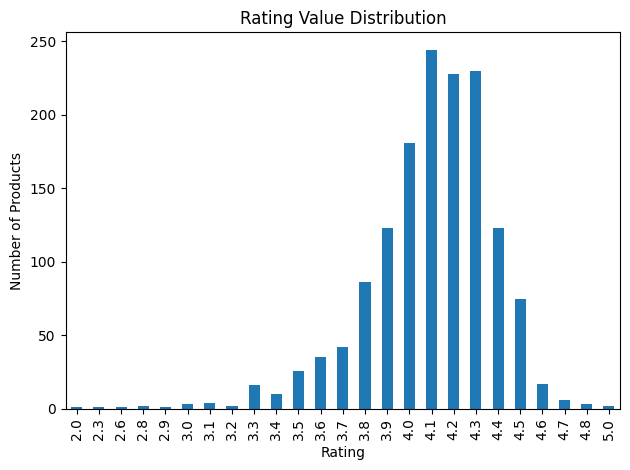

In [44]:
# Q12. Distribution of rating values (bar chart)
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Rating Value Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()


In [47]:
# Q13. Product with longest review content (assuming 'description' as review)
longest_review = df.loc[df['review_content'].str.len().idxmax(), ['user_name', 'product_id']]
print(f"Product with Longest Review: User {longest_review['user_name']}, Product ID {longest_review['product_id']}")



Product with Longest Review: User neeraj vishwakarma,⚡ pushpendra singh patel ⚡,sanjeev ydv,eshan garg,arvind,niharika,parvesh,amazon customer, Product ID B008QTK47Q


In [48]:
# Q14. Correlation between rating and discount percentage
correlation = df['rating'].corr(df['discount_percentage'])
print(f"Correlation between Rating and Discount Percentage: {correlation:.2f}")

Correlation between Rating and Discount Percentage: -0.16


In [49]:
# Q15. Difference in avg rating between top 10% and bottom 10% products by rating count
top10 = df[df['rating_count'] >= df['rating_count'].quantile(0.9)]['rating'].mean()
bottom10 = df[df['rating_count'] <= df['rating_count'].quantile(0.1)]['rating'].mean()
print(f"Avg Rating Top 10% by Rating Count: {top10:.2f}")
print(f"Avg Rating Bottom 10% by Rating Count: {bottom10:.2f}")

Avg Rating Top 10% by Rating Count: 4.17
Avg Rating Bottom 10% by Rating Count: 3.95


Category and Product Analysis


In [50]:
# Q16. Category with most unique products
most_unique_cat = df.groupby('category')['product_id'].nunique().idxmax()
print(f"Category with Most Unique Products: {most_unique_cat}")

Category with Most Unique Products: computers&accessories|accessories&peripherals|cables&accessories|cables|usbcables


In [51]:
# Q17. Average discounted price per category
avg_disc_by_cat = df.groupby('category')['discounted_price'].mean()
print("Average Discounted Price per Category:")
print(avg_disc_by_cat)

Average Discounted Price per Category:
category
car&motorbike|caraccessories|interioraccessories|airpurifiers&ionizers                                                    2339.000000
computers&accessories|accessories&peripherals|adapters|usbtousbadapters                                                    221.500000
computers&accessories|accessories&peripherals|audio&videoaccessories|pcheadsets                                            649.000000
computers&accessories|accessories&peripherals|audio&videoaccessories|pcmicrophones                                         574.000000
computers&accessories|accessories&peripherals|audio&videoaccessories|pcspeakers                                            749.000000
                                                                                                                             ...     
officeproducts|officepaperproducts|paper|stationery|pens,pencils&writingsupplies|pens&refills|gelinkrollerballpens         150.000000
officeproducts

In [52]:
# Q18. Top 10 most frequent product names
top10_products = df['product_name'].value_counts().head(10)
print("Top 10 Most Frequent Product Names:")
print(top10_products)

Top 10 Most Frequent Product Names:
product_name
fire-boltt ninja call pro plus 1.83" smart watch with bluetooth calling, ai voice assistance, 100 sports modes ip67 rating, 240*280 pixel high resolution                                            5
fire-boltt phoenix smart watch with bluetooth calling 1.3",120+ sports modes, 240*240 px high res with spo2, heart rate monitoring & ip67 rating                                                     4
portronics konnect l 1.2m fast charging 3a 8 pin usb cable with charge & sync function for iphone, ipad (grey)                                                                                       3
ptron solero tb301 3a type-c data and fast charging cable, made in india, 480mbps data sync, strong and durable 1.5-meter nylon braided usb cable for type-c devices for charging adapter (black)    3
duracell usb c to lightning apple certified (mfi) braided sync & charge cable for iphone, ipad and ipod. fast charging lightning cable, 3.9 feet (1.2m) - b

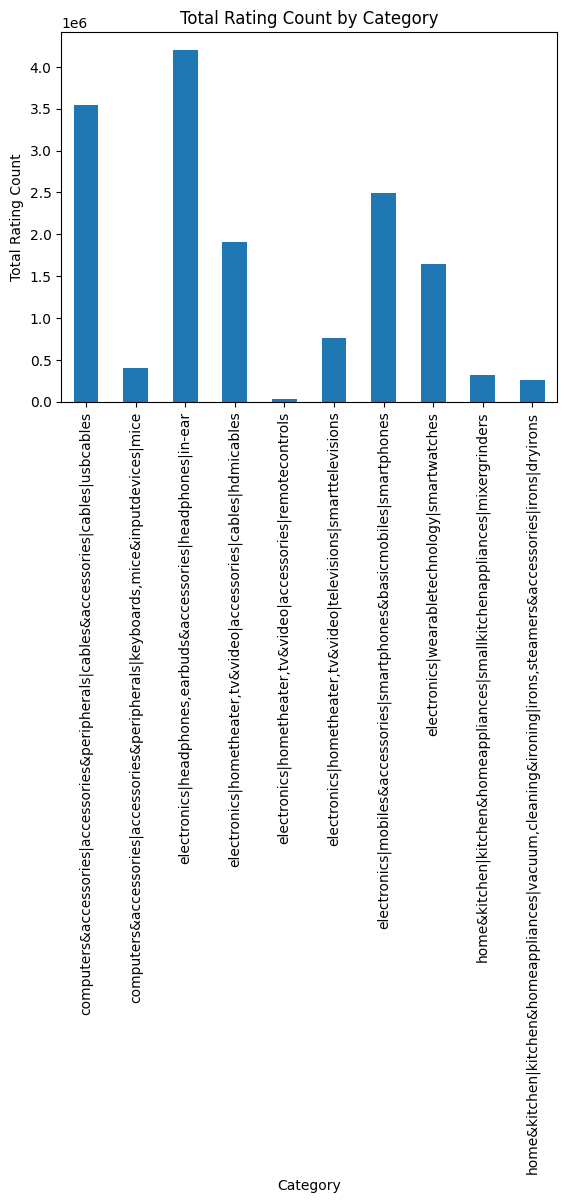

In [54]:
# Q19. Bar chart for accumulated rating count for top 10 categories
top10_cat = df['category'].value_counts().head(10).index
df[df['category'].isin(top10_cat)].groupby('category')['rating_count'].sum().plot(kind='bar')
plt.title('Total Rating Count by Category')
plt.xlabel('Category')
plt.ylabel('Total Rating Count')
plt.show()


In [55]:
# Q20. Coefficient of variation for discounted price in top 3 largest categories
top3_cat = df['category'].value_counts().nlargest(3).index
variation = df[df['category'].isin(top3_cat)].groupby('category')['discounted_price'].std() / \
            df[df['category'].isin(top3_cat)].groupby('category')['discounted_price'].mean()
print("Coefficient of Variation for Discounted Price in Top 3 Categories:")
print(variation)
print(f"Product with Longest Review: User {longest_review['user_name']}, Product ID {longest_review['product_id']}")


Coefficient of Variation for Discounted Price in Top 3 Categories:
category
computers&accessories|accessories&peripherals|cables&accessories|cables|usbcables    0.760742
electronics|mobiles&accessories|smartphones&basicmobiles|smartphones                 0.509477
electronics|wearabletechnology|smartwatches                                          0.646155
Name: discounted_price, dtype: float64
Product with Longest Review: User neeraj vishwakarma,⚡ pushpendra singh patel ⚡,sanjeev ydv,eshan garg,arvind,niharika,parvesh,amazon customer, Product ID B008QTK47Q


User and Distribution Analysis


In [57]:
# Q24. Top 10 users by review count
# Split the 'user_name' strings by comma, explode to get each user as a row
users_exploded = df['user_name'].str.split(',').explode()

# Count occurrences of each user and sort in descending order
top_users = users_exploded.value_counts().head(10)
print("Top 10 Users by Review Count:")

print(top_users)


Top 10 Users by Review Count:
user_name
amazon customer    641
placeholder         59
kindle customer     23
rajesh              23
arun                22
deepak              20
rohit               18
manoj kumar         16
vivek               14
karthik             14
Name: count, dtype: int64


In [58]:
# Q25. Unique users in Electronics category
unique_electronics_users = df[df['category'] == 'Electronics']['user_name'].nunique()
print(f"Unique Users in Electronics Category: {unique_electronics_users}")

Unique Users in Electronics Category: 0


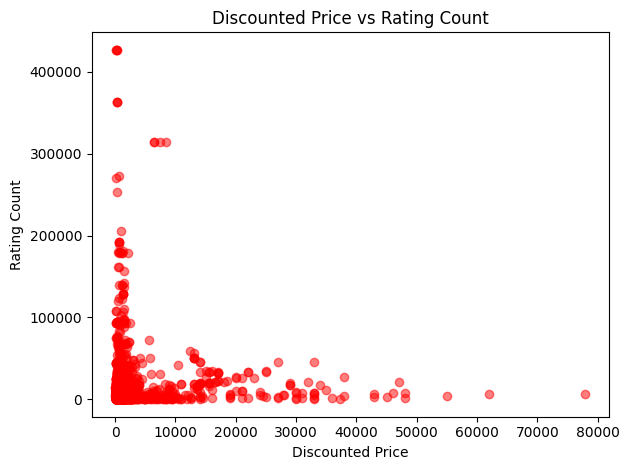

In [60]:
# Q26. Scatter plot of rating count vs discounted price
plt.scatter(df['discounted_price'], df['rating_count'],color='red', alpha=0.5)
plt.xlabel('Discounted Price')
plt.ylabel('Rating Count')
plt.title('Discounted Price vs Rating Count')
plt.tight_layout()
plt.show()


In [61]:
# Q27. Skewness and kurtosis of rating count
skewness = df['rating_count'].skew()
kurtosis = df['rating_count'].kurt()
print(f"Skewness of Rating Count: {skewness:.2f}")
print(f"Kurtosis of Rating Count: {kurtosis:.2f}")

Skewness of Rating Count: 5.67
Kurtosis of Rating Count: 40.33


In [62]:
# Q28. Group into 3 bins by discounted price and compute mean rating
df['price_bin'] = pd.qcut(df['discounted_price'], 3, labels=['Low', 'Medium', 'High'])
mean_rating_by_bin = df.groupby('price_bin')['rating'].mean()
print("Mean Rating by Discounted Price Bin:")
print(mean_rating_by_bin)

Mean Rating by Discounted Price Bin:
price_bin
Low       4.071429
Medium    4.092540
High      4.127932
Name: rating, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_5628\1145893132.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_by_bin = df.groupby('price_bin')['rating'].mean()


In [63]:
# Q29. Correlation matrix
corr_matrix = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961910            -0.242298   
actual_price                 0.961910      1.000000            -0.117855   
discount_percentage         -0.242298     -0.117855             1.000000   
rating                       0.121132      0.122467            -0.155679   
rating_count                -0.027304     -0.036215             0.011294   

                       rating  rating_count  
discounted_price     0.121132     -0.027304  
actual_price         0.122467     -0.036215  
discount_percentage -0.155679      0.011294  
rating               1.000000      0.102235  
rating_count         0.102235      1.000000  


In [64]:
# Q30. Percentage of products with discount >50% and rating >4.0
both_high = df[(df['discount_percentage'] > 50) & (df['rating'] > 4.0)]
percentage_both_high = len(both_high) / len(df) * 100
print(f"Percentage of Products with >50% Discount and >4.0 Rating: {percentage_both_high:.2f}%")


Percentage of Products with >50% Discount and >4.0 Rating: 28.25%
